In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time
import scipy.optimize


plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)


In [3]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Michelson-interferometer", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Michelson-interferometer"]

def get_ts_Vs(entries):
    ts = []
    Vas = []
    Vbs = []
    #for entry in entries:
    data = io.loadmat(path_array[0] + entries)
    Vb = np.transpose(data.get("B"))[0]
    #print(Vb)
    Va = np.transpose(data.get("A"))[0]
    t = np.linspace(0,100, len(Vb))
    Vas.append(Va)
    Vbs.append(Vb)
    ts.append(t)
    return ts, Vas, Vbs


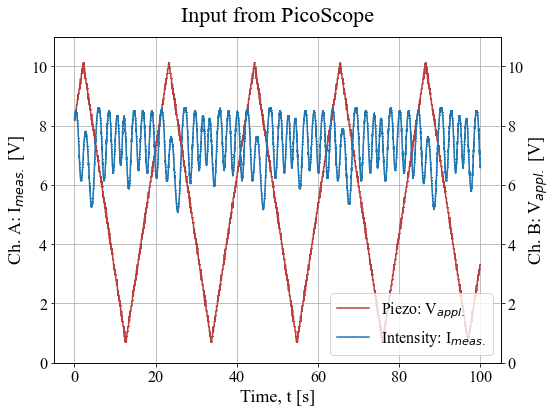

In [4]:
ts, Vas, Vbs = get_ts_Vs(r"/Dag 1 - Data_10.mat")

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.set_title("Input from PicoScope", pad = 15)

skip_every = 24

ax2 = ax1.twinx()

ax2.plot(ts[0][0:len(ts[0]):skip_every], Vas[0][0:len(ts[0]):skip_every], marker=',', color='tab:blue', label='Intensity: I$_{meas.}$')



ax1.plot(ts[0][0:len(ts[0]):skip_every], Vbs[0][0:len(ts[0]):skip_every], marker=',', color='#bb3f3f', label='Piezo: V$_{appl.}$')

ax2.set_ylim(0, 11)
ax1.set_ylim(0, 11)

ax1.grid()

ax1.set_xlabel("Time, t [s]")
ax2.set_ylabel("Ch. B: V$_{appl.}$ [V]")
ax1.set_ylabel("Ch. A: I$_{meas.}$ [V]")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

#plt.savefig("Raw data.png", format="png")


Text(0.5, 1.0, 'Intensity as a function of voltage applied to piezo')

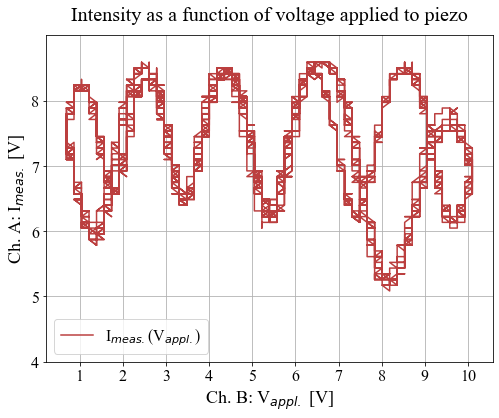

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

skip_every = 32

Vas2 = Vas[0]
Vbs2 = Vbs[0]

ax.plot(Vbs2[0:len(Vbs[0]):skip_every], Vas2[0:len(Vbs[0]):skip_every], '-', color='#bb3f3f', label='I$_{meas.}$(V$_{appl.}$)')
ax.grid()
ax.set_ylim(4, 9)
ax.legend(loc='lower left')
ax.set_xlabel("Ch. B: V$_{appl.}$ [V]")
ax.set_ylabel("Ch. A: I$_{meas.}$ [V]")

ax.set_yticks(np.arange(4,9,1))
ax.set_xticks(np.arange(1, 11, 1))

ax.set_title("Intensity as a function of voltage applied to piezo", pad=15, size=20)

#plt.savefig("I(V).png", format="png")



In [6]:
forward_tracks_list = []
forward_ts_list = []

backward_tracks_list = []
backward_ts_list = []
one_fscan = []

st = time.time()

i_final = 0
abe = 0
nextrun = True
i_prev = 0

while(abe < 11):
    dy_init = 0
    
    forward_tracks = []
    
    backward_tracks = []
    
    forward_ts = []
    backward_ts = []
    
    i = 0
    for t, Vd in zip(ts[0][i_prev::], Vbs[0][i_prev::]):
        if i == 0:
            curr_Vb = Vd
        else:
            if len(forward_tracks) == 0 and len(backward_tracks) == 0:
                dy_init = (Vd - curr_Vb)/0.000104
                if dy_init > 0:
                    forward_tracks.append(Vd)
                    forward_ts.append(t)
                    
                if dy_init < 0:
                    backward_tracks.append(Vd)
                    backward_ts.append(t)
            
            if dy_init > 0:
                if (Vd - forward_tracks[-1])/0.000104 > 0:
                    forward_tracks.append(Vd)
                    forward_ts.append(t)
                    i_final = i
                
            if dy_init < 0:
                if (Vd - backward_tracks[-1])/0.000104 < 0:
                    backward_tracks.append(Vd)
                    backward_ts.append(t)
                    i_final = i
        i = i + 1
    i_prev = i_prev + i_final
    if dy_init > 0:
        forward_tracks_list.append(forward_tracks)
        forward_ts_list.append(forward_ts)
    if dy_init < 0:
        backward_tracks_list.append(backward_tracks)
        backward_ts_list.append(backward_ts)
    #print(i_final)
    #print(dy_init)
    
    abe = abe + 1

end = time.time()
print('Elapsed time:', end - st, "seconds")

Elapsed time: 29.750471591949463 seconds


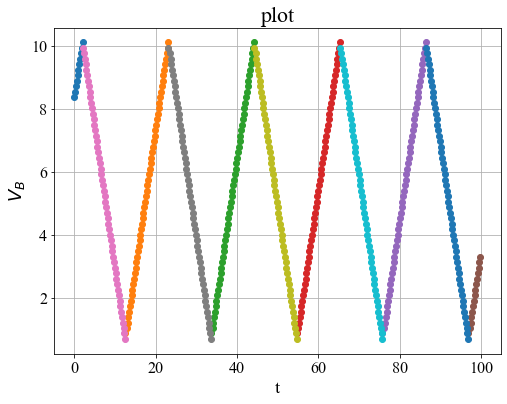

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("plot")
ax.set_xlabel("t")
ax.set_ylabel(r"$V_B$")
#ax.plot(ts[0][0:34804], Vbs[0][0:34804])
#ax.plot(tsMin, minVbs, 'o')
#ax.plot(tsMax, maxVbs, 'o')#[0:8000]
for tsw, forw in zip(forward_ts_list, forward_tracks_list):
    ax.plot(tsw, forw, 'o')

for tsb, backw in zip(backward_ts_list, backward_tracks_list):
    ax.plot(tsb, backw, 'o')

ax.grid()

In [9]:
index_list = []
Va_forward_list = []
Va_backward_list = []

for track in forward_ts_list :
    Va = []
    for t_in_list in track : 
        i = np.where(ts[0] == t_in_list)
        #index_list.append(i[0][0])
        Va.append(Vas[0][i[0][0]])
    
    Va_forward_list.append(Va)

for track in backward_ts_list : 
    Va = []
    for t_in_list in track : 
        i = np.where(ts[0] == t_in_list)
        Va.append(Vas[0][i[0][0]])
    
    Va_backward_list.append(Va)
        

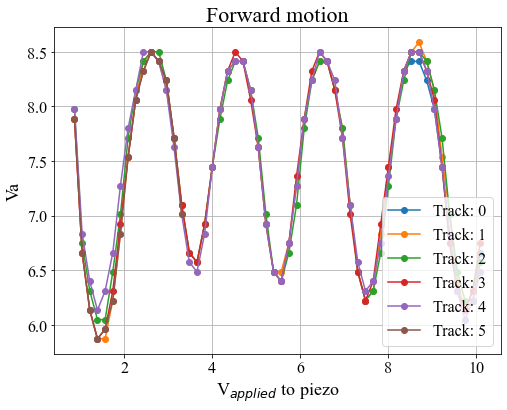

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("Forward motion")
ax.set_xlabel("V$_{applied}$ to piezo")
ax.set_ylabel("Va")
ax.grid()
for index, Vb, Va in zip(range(len(forward_tracks_list)), forward_tracks_list, Va_forward_list) : 
    Va_slope = np.gradient(Va)    
    ax.plot(Vb, Va, '-o', label="Track: {}".format(index))
ax.legend(loc = 'lower right')

#plt.savefig("Forward_trace2.png", format="png")


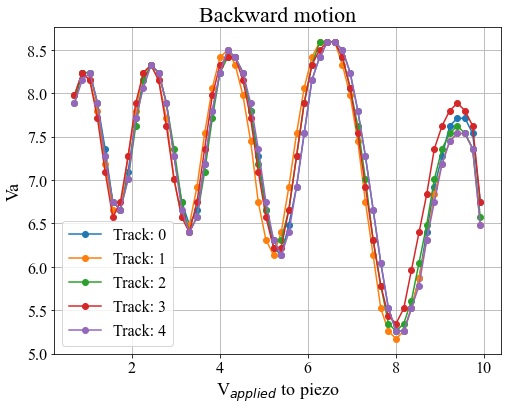

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Backward motion")
ax.set_xlabel("V$_{applied}$ to piezo")
ax.set_ylabel("Va")
ax.grid()
for i, Vb, Va in zip(range(len(backward_tracks_list)), backward_tracks_list, Va_backward_list) : 
    ax.plot(Vb, Va, '-o', label = 'Track: {}'.format(i))

ax.legend(loc = 'lower left')

#plt.savefig("Backward_trace2.png", format="png")

In [12]:
def multiplier(liste, factor) : 
    new_list = []
    for i in liste : 
        new_list.append(i*factor)
    
    return new_list

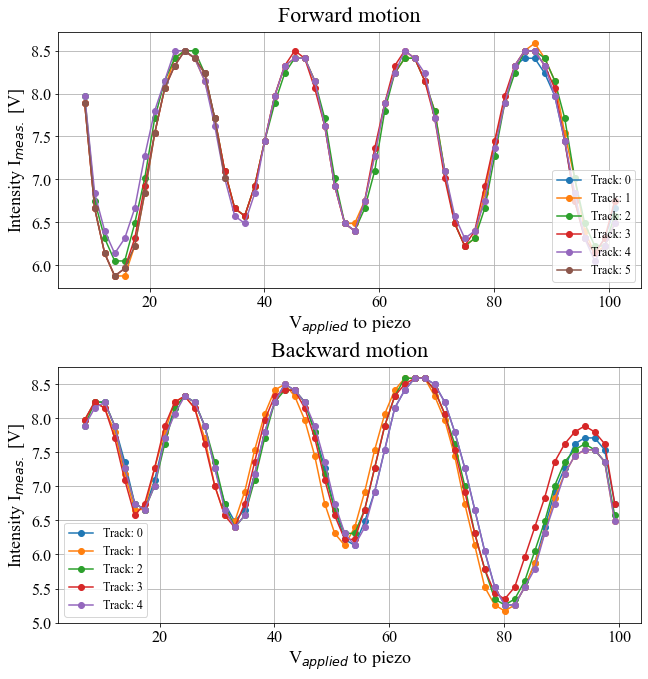

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.tight_layout(pad=5)
legend_size = 12

ax[0].set_title("Forward motion", pad = 10)
ax[0].set_xlabel("V$_{applied}$ to piezo")
ax[0].set_ylabel("Intensity I$_{meas.}$ [V]")
ax[0].grid()
for index, Vb, Va in zip(range(len(forward_tracks_list)), forward_tracks_list, Va_forward_list) : 
    Va_slope = np.gradient(Va)    
    ax[0].plot(multiplier(Vb, 10), Va, '-o', label="Track: {}".format(index))
ax[0].legend(loc = 'lower right', prop={'size': legend_size})

ax[1].set_title("Backward motion", pad = 10)
ax[1].set_xlabel("V$_{applied}$ to piezo")
ax[1].set_ylabel("Intensity I$_{meas.}$ [V]")
ax[1].grid()
for i, Vb, Va in zip(range(len(backward_tracks_list)), backward_tracks_list, Va_backward_list) : 
    ax[1].plot(multiplier(Vb, 10), Va, '-o', label = 'Track: {}'.format(i))

ax[1].legend(loc = 'lower left', prop={'size': legend_size})

plt.savefig("Motion_trace2.png", format="png")


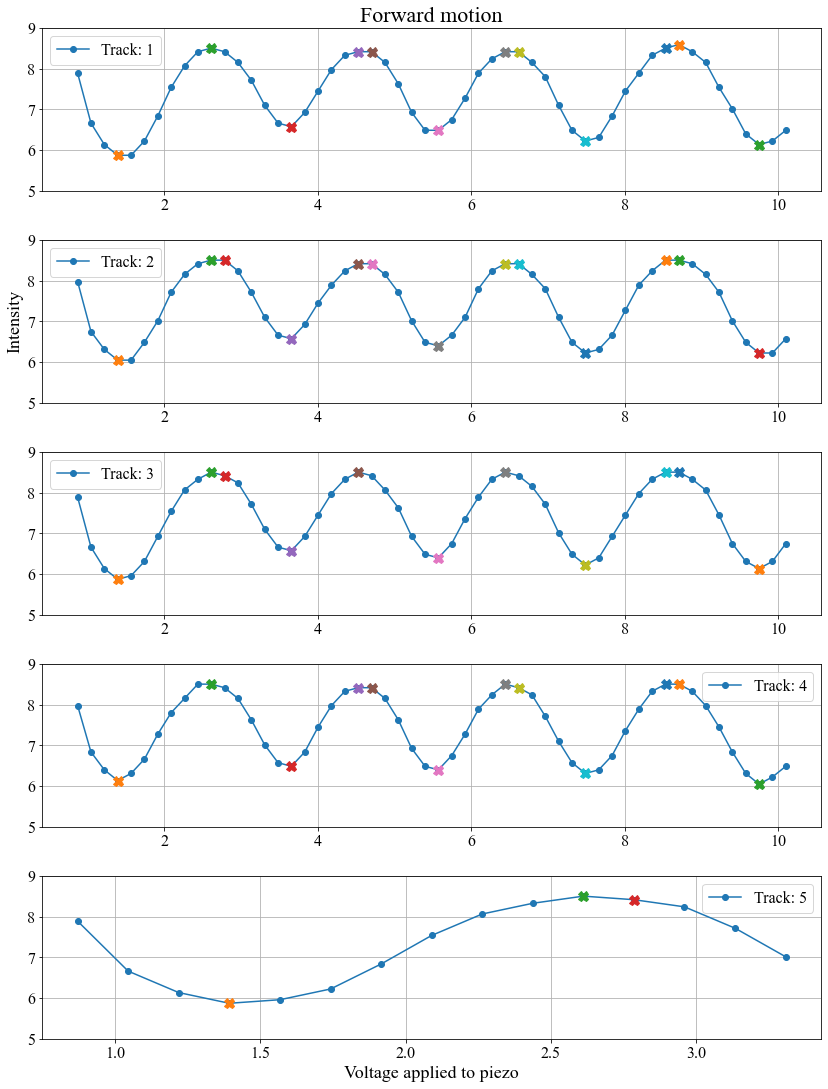

In [20]:
fig, ax = plt.subplots(len(Va_forward_list), 1, figsize=(12,15), sharey = True)
fig.tight_layout(pad=2.0)
ax[0].set_title("Forward motion")
ax[0].set_ylim(5, 9)
ax[-1].set_xlabel("Voltage applied to piezo")
ax[1].set_ylabel("Intensity")


forward_extrema = []

#del Va_forward_list[0]
#del forward_tracks_list[0]

for plt_nr, Vb, Va in zip(range(len(Va_forward_list)), forward_tracks_list, Va_forward_list) : 
    ax[plt_nr].plot(Vb, Va, '-o', label='Track: {}'.format(plt_nr+1))
    ax[plt_nr].grid()
    
    Va_slope = np.gradient(Va)
        
    ax[plt_nr].legend()
    
    extrema = []
    
    delta = 0.135
    extremas = np.where((Va_slope < delta) & (Va_slope > -delta))
    for point in extremas[0] :
        ax[plt_nr].plot(Vb[point], Va[point], 'X', markersize=10)
        extrema.append(Vb[point])   
    
    forward_extrema.append(extrema)
    

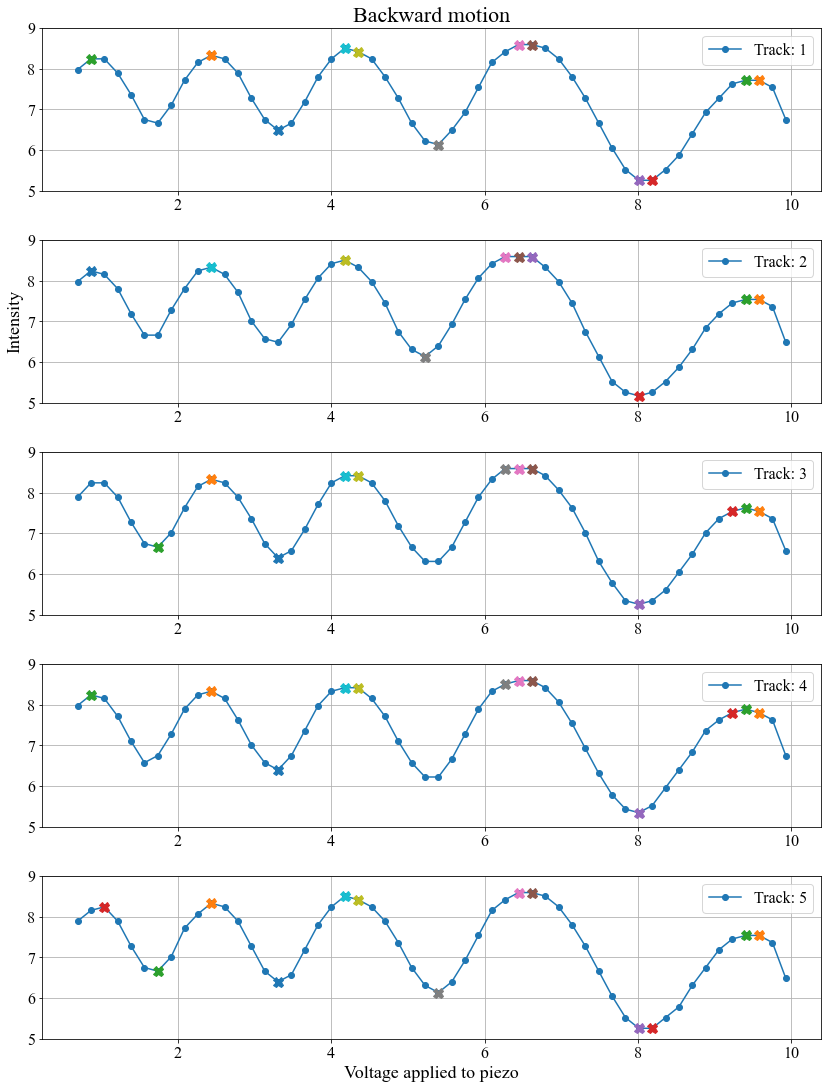

In [18]:
fig, ax = plt.subplots(len(Va_backward_list), 1, figsize = (12 ,15), sharey = True)
fig.tight_layout(pad=2.0)
ax[0].set_title("Backward motion")
ax[0].set_ylim(5, 9)
ax[-1].set_xlabel("Voltage applied to piezo")
ax[1].set_ylabel("Intensity")

backward_extrema = []

#del Va_backward_list[-1]
#del backward_tracks_list[-1]

for plt_nr, Vb, Va in zip(range(len(Va_backward_list)), backward_tracks_list, Va_backward_list) : 
    
    ax[plt_nr].plot(Vb, Va, '-o', label='Track: {}'.format(plt_nr+1))
    ax[plt_nr].legend()
    ax[plt_nr].grid()
    
    Va_slope = np.gradient(Va)
    extrema_list = []
    
    delta = 0.135
    extremas = np.where((Va_slope < delta) & (Va_slope > -delta))
    for point in extremas[0] : 
        ax[plt_nr].plot(Vb[point], Va[point], 'X', markersize=10)
        
        extrema_list.append(Vb[point])
    
    backward_extrema.append(extrema_list)
    

In [21]:

def delta_s_maker(extrema_list, forward) :
    wavelength = 0.633 # nm
    delta_s_list = []
    V_appl_list = []
    
    if forward == True : 
        # Minima first
        for liste in extrema_list :
            delta_s = []
            V_appl = []
            for index in range(len(liste)) : 
                delta_s.append(index*wavelength/2)
                V_appl.append(liste[index])
            
            delta_s_list.append(delta_s)
            V_appl_list.append(V_appl)
            
    if forward == False : 
        # Maxima first
        # Read list from backwards
        #new_list = list(reversed(extrema_list))
        for liste in extrema_list : 
            delta_s = []
            V_appl = []
            for index in range(len(liste)) : 
                delta_s.append(index*wavelength/2)
                V_appl.append(liste[index])
            
            delta_s_list.append(delta_s)
            V_appl_list.append(V_appl)
        
    return V_appl_list, delta_s_list




In [22]:
def straight_line(V, *p) : 
    a = p[0]
    b = p[1]
    return a*V+b


alpha: [0.022079198681380377, 0.023618835175809313, 0.01856955314803832, 0.022079198681380377, 0.01912781559877727]
sigma_alpha [0.0007930176078478643, 0.0006137243722029265, 0.0005515184098157897, 0.0007930176078478643, 0.008283808061160653]


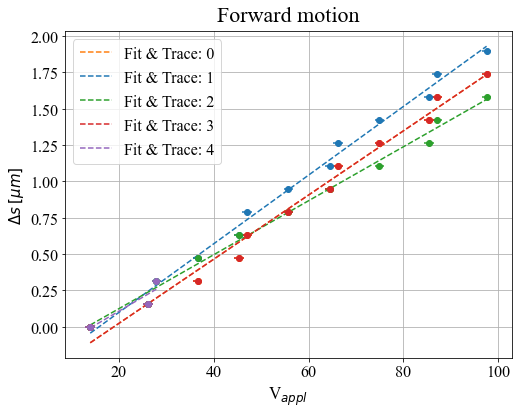

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

V_appl_list_f, delta_s_list_f = delta_s_maker(forward_extrema, True)

alph_f = []
uncer_f = []

col_ary = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

for i, V, s in zip(range(len(V_appl_list_f)), V_appl_list_f, delta_s_list_f) :
    V_new = multiplier(V, 10)
    s = multiplier(s, 1/2)

    init_guess = [0.02, 1]
    p_opt, p_cov = curve_fit(straight_line, V_new, s, p0=init_guess, absolute_sigma=False)
    V_fit = np.linspace(min(V_new), max(V_new))
    s_fit = straight_line(V_fit, *p_opt)
    
    alph_f.append(p_opt[0])
    uncer_f.append(np.sqrt(p_cov[0][0]))
    
    ax.errorbar(V_new, s, xerr = np.full(len(V_new), 1), fmt = 'o', color = col_ary[i])
    ax.plot(V_fit, s_fit, '--', label='Fit & Trace: {}'.format(i), color=col_ary[i])

ax.legend()
ax.grid()
ax.set_xlabel("V$_{appl}$", fontsize=17)
ax.set_ylabel("$\Delta s$ $[\mu m]$", fontsize=15)
ax.set_title("Forward motion", pad = 10)

print('alpha:', alph_f)
print('sigma_alpha', uncer_f)

plt.savefig("Trace2_dag1f.png", format="png")


alpha: [0.020308484875114833, 0.016575008896944497, 0.020488322211429776, 0.01951539803276009, 0.021415220981996035]
sigma_alpha [0.0007798358500779264, 0.001252365597408627, 0.0009256550896850666, 0.0009927588667900597, 0.0005321973127554102]


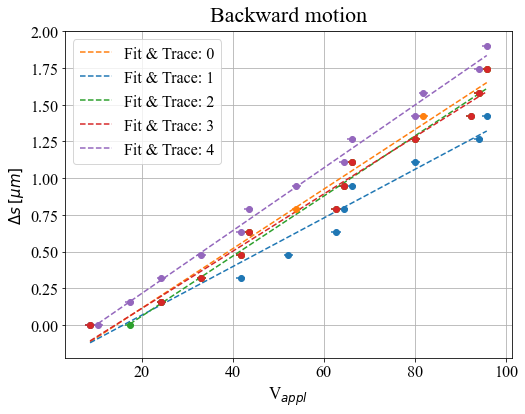

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

V_appl_list_b, delta_s_list_b = delta_s_maker(backward_extrema, False)

alph_b = []
uncer_b = []


for i, V, s in zip(range(len(V_appl_list_b)), V_appl_list_b, delta_s_list_b) :
    V_new = multiplier(V, 10)[::-1]
    s = multiplier(s, 1/2)
    
    init_guess = [0.02, 1]
    p_opt, p_cov = curve_fit(straight_line, V_new, s, p0=init_guess, absolute_sigma=False)
    V_fit = np.linspace(min(V_new), max(V_new))
    s_fit = straight_line(V_fit, *p_opt)
        
    alph_b.append(p_opt[0])
    uncer_b.append(np.sqrt(p_cov[0][0]))
    
    ax.errorbar(V_new, s, xerr = np.full(len(V_new), 1), fmt = 'o', color = col_ary[i])
    ax.plot(V_fit, s_fit, '--', label='Fit & Trace: {}'.format(i), color=col_ary[i])
    

ax.legend()
ax.grid()
ax.set_xlabel("V$_{appl}$", fontsize=17)
ax.set_ylabel("$\Delta s$ $[\mu m]$", fontsize=15)
ax.set_title("Backward motion", pad = 10)

print('alpha:', alph_b)
print('sigma_alpha', uncer_b)

plt.savefig("Trace 2_dag1b.png", format="png")


In [31]:
def weighted_mean(uncer, point) : 
    top = 0
    bottom = 0
    for sig, val in zip(uncer, point) : 
        top += (1/(sig**2))*val
        bottom += (1/(sig**2))
    return top/bottom

def weighted_mean_uncer(uncer) : 
    sum_uncer = 0
    for i in uncer:
        sum_uncer += np.sqrt(i**2)
    return sum_uncer

print(len(uncer_f))

print(weighted_mean(uncer_f, alph_f), weighted_mean_uncer(uncer_f))
print(weighted_mean(uncer_b, alph_b), weighted_mean_uncer(uncer_b))

5
0.021259082325206236 0.011035086058875099
0.020425102608821907 0.004482812716717089
